In [3]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.3 MB/s 
     |████████████████████████████████| 981 kB 54.1 MB/s 
     |████████████████████████████████| 263 kB 64.0 MB/s 
     |████████████████████████████████| 3.8 MB 65.6 MB/s 
     |████████████████████████████████| 1.3 MB 61.4 MB/s 
     |████████████████████████████████| 468 kB 71.9 MB/s 
     |████████████████████████████████| 120 kB 75.8 MB/s 
     |████████████████████████████████| 880 kB 67.4 MB/s 
     |████████████████████████████████| 6.6 MB 50.8 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.7-py3-none-any.whl size=25312842 sha256=afc4e9dcffcf407625a15423ebb61fa9c484fa5dfe47ed1cedb3f144254fc75e
  Stored in directory: /root/.cache/pip/wheels/e5/98/8e/ce355dcb92451e85fab93f7ea2da068843e93e703928cd06fb
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=57be34d5b28e1852d6f42e61

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import re
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.preprocessing import LabelEncoder

In [4]:
import seaborn as sns
import tensorflow as tf
import ktrain
from ktrain import text

In [14]:
#Loading Data 
df = pd.read_csv('all-data.csv',encoding='ISO-8859-1')
df.columns =['Sentiment', 'Sentence']
display(df)

,Sentiment,Sentence
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [15]:
#find how many labels 
df['Sentiment'].value_counts()

neutral     2878
positive    1363
negative     604
Name: Sentiment, dtype: int64

In [16]:
#check for missing data
print(df.isna().sum())

Sentiment    0
Sentence     0
dtype: int64


In [17]:
# dropping the missing data

df.dropna(axis=0,inplace=True)
print(df.shape)

(4845, 2)


In [18]:
# check for duplicated data
print(len(df[df.duplicated()]))
df.drop_duplicates(inplace=True)
print(len(df[df.duplicated()]))

6
0


In [19]:
#Text Cleaning
def normalize(msg):
    
    msg = re.sub('[^A-Za-z]+', ' ', msg) #remove special character and intergers
    doc = nlp(msg)
    res=[]
    for token in doc:
        if(token.is_stop or token.is_punct or token.is_currency or token.is_space or len(token.text) <= 2): #word filteration
            pass
        else:
            res.append(token.lemma_.lower()) #change to lower cases
    return res

In [20]:
df['Sentence'] = df['Sentence'].apply(normalize)
display(df)

,Sentiment,Sentence
0,neutral,"[technopoli, plan, develop, stage, area, squar..."
1,negative,"[international, electronic, industry, company,..."
2,positive,"[new, production, plant, company, increase, ca..."
3,positive,"[accord, company, update, strategy, year, basw..."
4,positive,"[financing, aspocomp, growth, aspocomp, aggres..."
...,...,...
4840,negative,"[london, marketwatch, share, price, end, lower..."
4841,neutral,"[rinkuskiai, beer, sale, fall, cent, million, ..."
4842,negative,"[operate, profit, fall, eur, eur, include, ves..."
4843,negative,"[net, sale, paper, segment, decrease, eur, sec..."


In [21]:
df['Sentence'] = df['Sentence'].apply(lambda m: " ".join(m))
df.head()

,Sentiment,Sentence
0,neutral,technopoli plan develop stage area square mete...
1,negative,international electronic industry company elco...
2,positive,new production plant company increase capacity...
3,positive,accord company update strategy year basware ta...
4,positive,financing aspocomp growth aspocomp aggressivel...


In [22]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df, 
                                                                    'Sentence',
                                                                    label_columns=['Sentiment'],
                                                                    maxlen=500,
                                                                    preprocess_mode='bert')

['negative', 'neutral', 'positive']
      negative  neutral  positive
4226       0.0      1.0       0.0
677        1.0      0.0       0.0
1144       0.0      0.0       1.0
1740       0.0      0.0       1.0
2390       0.0      1.0       0.0
['negative', 'neutral', 'positive']
      negative  neutral  positive
496        0.0      0.0       1.0
4255       0.0      1.0       0.0
216        0.0      0.0       1.0
3799       0.0      1.0       0.0
3869       0.0      0.0       1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [23]:
model = text.text_classifier(name='bert',
                             train_data=(x_train, y_train),
                             preproc=preproc)

Is Multi-Label? False
maxlen is 500
done.


In [24]:
learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=6)

In [25]:
learner.fit_onecycle(lr=2e-5,
                     epochs=2)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
726/726 [==============================] - 650s 864ms/step - loss: 0.6988 - accuracy: 0.6962 - val_loss: 0.5527 - val_accuracy: 0.7975
Epoch 2/2
726/726 [==============================] - 623s 858ms/step - loss: 0.3931 - accuracy: 0.8468 - val_loss: 0.4803 - val_accuracy: 0.8202


In [26]:
learner.validate(val_data=(x_test, y_test))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72        75
           1       0.88      0.88      0.88       282
           2       0.71      0.79      0.75       127

    accuracy                           0.82       484
   macro avg       0.80      0.77      0.78       484
weighted avg       0.82      0.82      0.82       484



array([[ 49,  12,  14],
       [  7, 248,  27],
       [  5,  22, 100]])

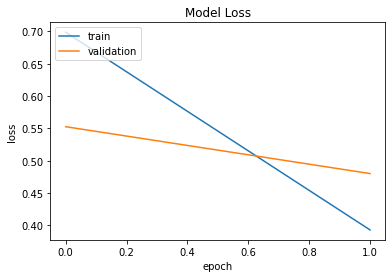

In [27]:
learner.plot('loss')

In [28]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [29]:
predictor.get_classes()

['negative', 'neutral', 'positive']

In [30]:
text = [ 'Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 , representing 9.7 % of net sales ',
        'Rental of building equipment accounted for 88 percent of the operating income ']
#text = [normalize(t) for t in text]        

In [31]:
#text = [" ".join(m) for m in text]

In [32]:
predictor.predict(text)

['positive', 'neutral']

In [33]:
# save model for later use
predictor.save('model2_predictor')

In [35]:
# reload model
p = ktrain.load_predictor('model2_predictor')

In [1]:
p.predict("One of the challenges in the oil production in the North Sea is scale formation that can plug pipelines and halt production .")

NameError: name 'p' is not defined